In [37]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

import japanize_matplotlib

In [38]:
pl.Config.set_fmt_str_lengths(100)
pl.Config.set_tbl_rows(10)

polars.config.Config

In [39]:
train = pl.read_csv("../data/train.csv")
anime = pl.read_csv("../data/anime.csv")
test = pl.read_csv("../data/test.csv")
sample_submission = pl.read_csv("../data/sample_submission.csv")

# Define

In [40]:
def make_hist(df: pl.DataFrame, col: str, bins: int | None = None):
    if bins:
        plt.hist(df.get_column(col), bins=bins);
    else:
        plt.hist(df.get_column(col));
    plt.xlabel(f"{col}");
    plt.ylabel("count");
    plt.title(f"{col}の分布");

# Train

In [41]:
train.head()

user_id,anime_id,score
str,str,i64
"""0008e10fb39e55447333""","""0669cc0219d468761195""",2
"""0008e10fb39e55447333""","""111adb8835b8a1a2cf54""",10
"""0008e10fb39e55447333""","""1fc8683c393432a2f9c7""",1
"""0008e10fb39e55447333""","""2290175205d55e81b197""",8
"""0008e10fb39e55447333""","""28f173b60331d5cabb0d""",9


In [42]:
average_score_per_user = train.groupby("user_id").agg(
    pl.count("user_id").alias("count"),
    pl.mean("score").alias("average_score")
)

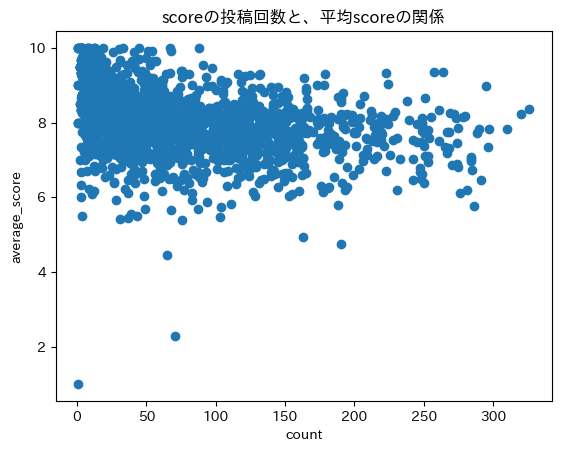

In [43]:
plt.scatter(average_score_per_user.get_column("count"), average_score_per_user.get_column("average_score"));
plt.xlabel("count");
plt.ylabel("average_score");
plt.title("scoreの投稿回数と、平均scoreの関係");

- countが小さいときは、10から0までブレる
- countが大きくなれば、平均8にならされていく

In [46]:
train.pivot(
    values="user_id",
    index="score",
    columns="user_id",
    aggregate_function="count"
).sort(by="score", descending=True)#.write_csv("tst.csv")

score,0008e10fb39e55447333,001a7aed2546342e2602,003d4b0257cc7849ffe1,0054e700b5be6e074fb7,0059344eed7e8ca0b6c5,005b886c0776f8a47ea7,0064eae414e82b36d66a,006612dafd9e4a003d16,00b1b1b700264f72afe8,00dabe82bace31f2e2f1,00e6c1bf0d1010c436ea,0158085db08b2457a297,01617d4f0f82c725742b,0169abd848fd39d627aa,019123288497ea8ee320,01d791a755d41f46b6ff,01ead425093a217af2dc,0218fe813c2a9aff91cb,02388c6fcaf08c1d2c72,02800b03e234d8f75e19,02ccb44f9d9a355aa088,02d06e8b57e5a7c5c4b5,02e0b561c0d4962181fe,030f0bb2aa7c2d502851,038682a2ca398154e4be,0391d806f174797f1a4b,039d48ee94e1570fdb0c,03bd11397de87ab603da,03e9afeeba1d2b231ad9,0469f481146e89439fd6,049577c1ea8212134b29,04bd2f2a75581ac1fccd,04e5146684ae0f415981,04f65ef408a6b39e27f0,052bda0239ce5b35eb08,05c72131eee9af4ac604,…,f854864eef4438e4418c,f855b004f895a4912fcf,f892b816473d6204c011,f8e3ea3b0397561e0484,f8e76ac3508b9cfdf0d9,f8ef93a014fb9775a150,f8feac2eec2f002c52ba,f934dc4ff96edc3d16f0,f93c0563ee5be0c327e7,f94fcdfa716dd3609ad6,f96314355a1009516040,f965bb0f81d3e2433545,f99022be4b9a8ab603e6,f9b64eb4f4f5dd475af7,f9c2fe772c5f5f054928,f9c5f3e981865b24840b,fa07d9248d010e981461,fa19e845d7dc97ecc1ca,fa402da9cfc5cbecff9e,fa554e70872cff44a064,fae03f0343f93db5db95,fb0359d2393d0350ff3c,fb1525084311230fb5dd,fbd7d445ba44eeea6f23,fbf8a91add757ec1d93c,fcdecc1f53f9ab667373,fd11fbb6eab64511f6be,fd1f2202544f0e6e632c,fd4845e95839a4c5e8ed,fdcaf06801c64695950b,fdf37675876b15128b77,fe23a25ee8f0a7d09d0d,fe9c772c995668ea3b75,feef23df0d53eec7d697,ff441af085c3522f62ba,ff5e8e9e3553b90f222a,ffa6ff8006f8630f3d11
i64,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,…,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
10,4,4,9,3,1,29,5,6,15,5,2,15,10,12,7,null,15,1,9,24,null,null,10,19,31,1,9,16,null,6,1,39,1,13,19,1,…,4,null,null,7,null,6,null,9,24,null,10,12,14,2,5,19,31,7,22,14,4,19,28,null,4,null,2,103,1,30,1,5,12,2,58,null,2
9,7,25,6,null,4,38,5,21,12,1,19,43,24,25,14,1,41,22,1,30,7,3,17,24,17,1,20,19,5,5,6,64,5,25,19,6,…,52,1,5,23,1,16,1,31,38,9,15,22,12,5,15,27,64,16,8,26,5,1,5,3,16,3,24,33,13,116,8,4,25,null,14,3,6
8,10,66,7,null,null,5,2,50,7,2,70,33,25,12,23,3,40,46,null,46,23,8,8,21,17,1,32,20,8,6,19,38,5,52,13,1,…,59,3,1,23,1,7,1,48,31,46,13,17,25,null,35,55,40,15,1,23,16,3,6,2,35,2,21,38,61,25,12,13,33,null,21,3,16
7,6,37,6,2,2,4,1,70,8,1,93,64,55,3,27,1,26,17,null,29,16,5,1,15,22,2,41,25,4,5,7,8,2,33,21,null,…,56,1,1,23,5,7,1,23,32,39,5,22,24,null,25,39,24,14,null,null,10,3,8,3,38,null,3,4,106,null,14,5,26,1,4,5,13
6,7,16,3,null,1,null,2,26,2,1,43,21,20,3,12,null,9,4,null,43,5,1,1,15,12,null,30,5,2,1,2,1,null,27,4,null,…,23,null,null,15,null,8,null,6,7,18,null,21,6,null,8,8,12,4,null,null,6,null,7,null,24,1,null,1,26,2,10,2,5,null,7,4,4
5,null,7,4,1,2,null,1,3,null,null,26,5,1,null,3,null,2,1,null,34,3,null,1,4,7,null,14,5,2,null,null,null,null,3,6,null,…,11,null,null,3,null,null,null,null,2,9,null,7,5,null,1,2,5,1,null,null,20,null,3,null,19,null,1,null,2,null,7,2,1,null,null,7,3
4,2,4,null,null,null,null,null,2,null,null,16,1,2,null,null,null,4,null,null,35,null,null,null,6,1,null,8,null,1,null,null,null,null,null,null,null,…,4,null,null,2,null,null,null,null,null,13,null,9,1,null,2,null,3,null,null,null,6,null,null,null,15,null,null,null,null,null,null,1,null,null,null,3,1
3,1,1,null,null,null,null,null,null,null,null,6,null,null,null,null,null,null,null,null,15,null,null,null,5,null,null,1,null,null,null,null,null,null,null,null,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,1,null,null,null,null,null,null,null,13,null,null,null,null,null,null,null,null,null,null,2,null
2,3,null,null,null,null,null,null,null,null,null,null,1,null,null,null,null,null,null,null,18,null,null,null,4,null,null,2,null,4,null,null,null,null,null,null,null,…,null,null,null,1,null,null,null,null,null,1,nul